In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e18/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e18/test.csv")

<div style="
           display:fill;
           border:solid;
           border-radius:5px;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
            border-style:solid;">

<h1 style="padding: 10px;text-align: center;"> Please upvote ⬆ upvote if you find this notebook insightful </h1></div>

In [3]:
train_data.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [4]:
train_data.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')

In [5]:
def corr_heatmap(dataset, label = None, cmap = "magma"):
    excluded_columns = ['id', 'EC3', 'EC4', 'EC5', 'EC6']
    columns = [col for col in dataset.columns if col not in excluded_columns]
    corr = dataset[columns].corr(method = 'spearman')
    
    plt.figure(figsize = (10, 10), dpi = 300)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = cmap, annot = True, annot_kws={"size": 5})
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 25, weight = 'bold')
    plt.show()

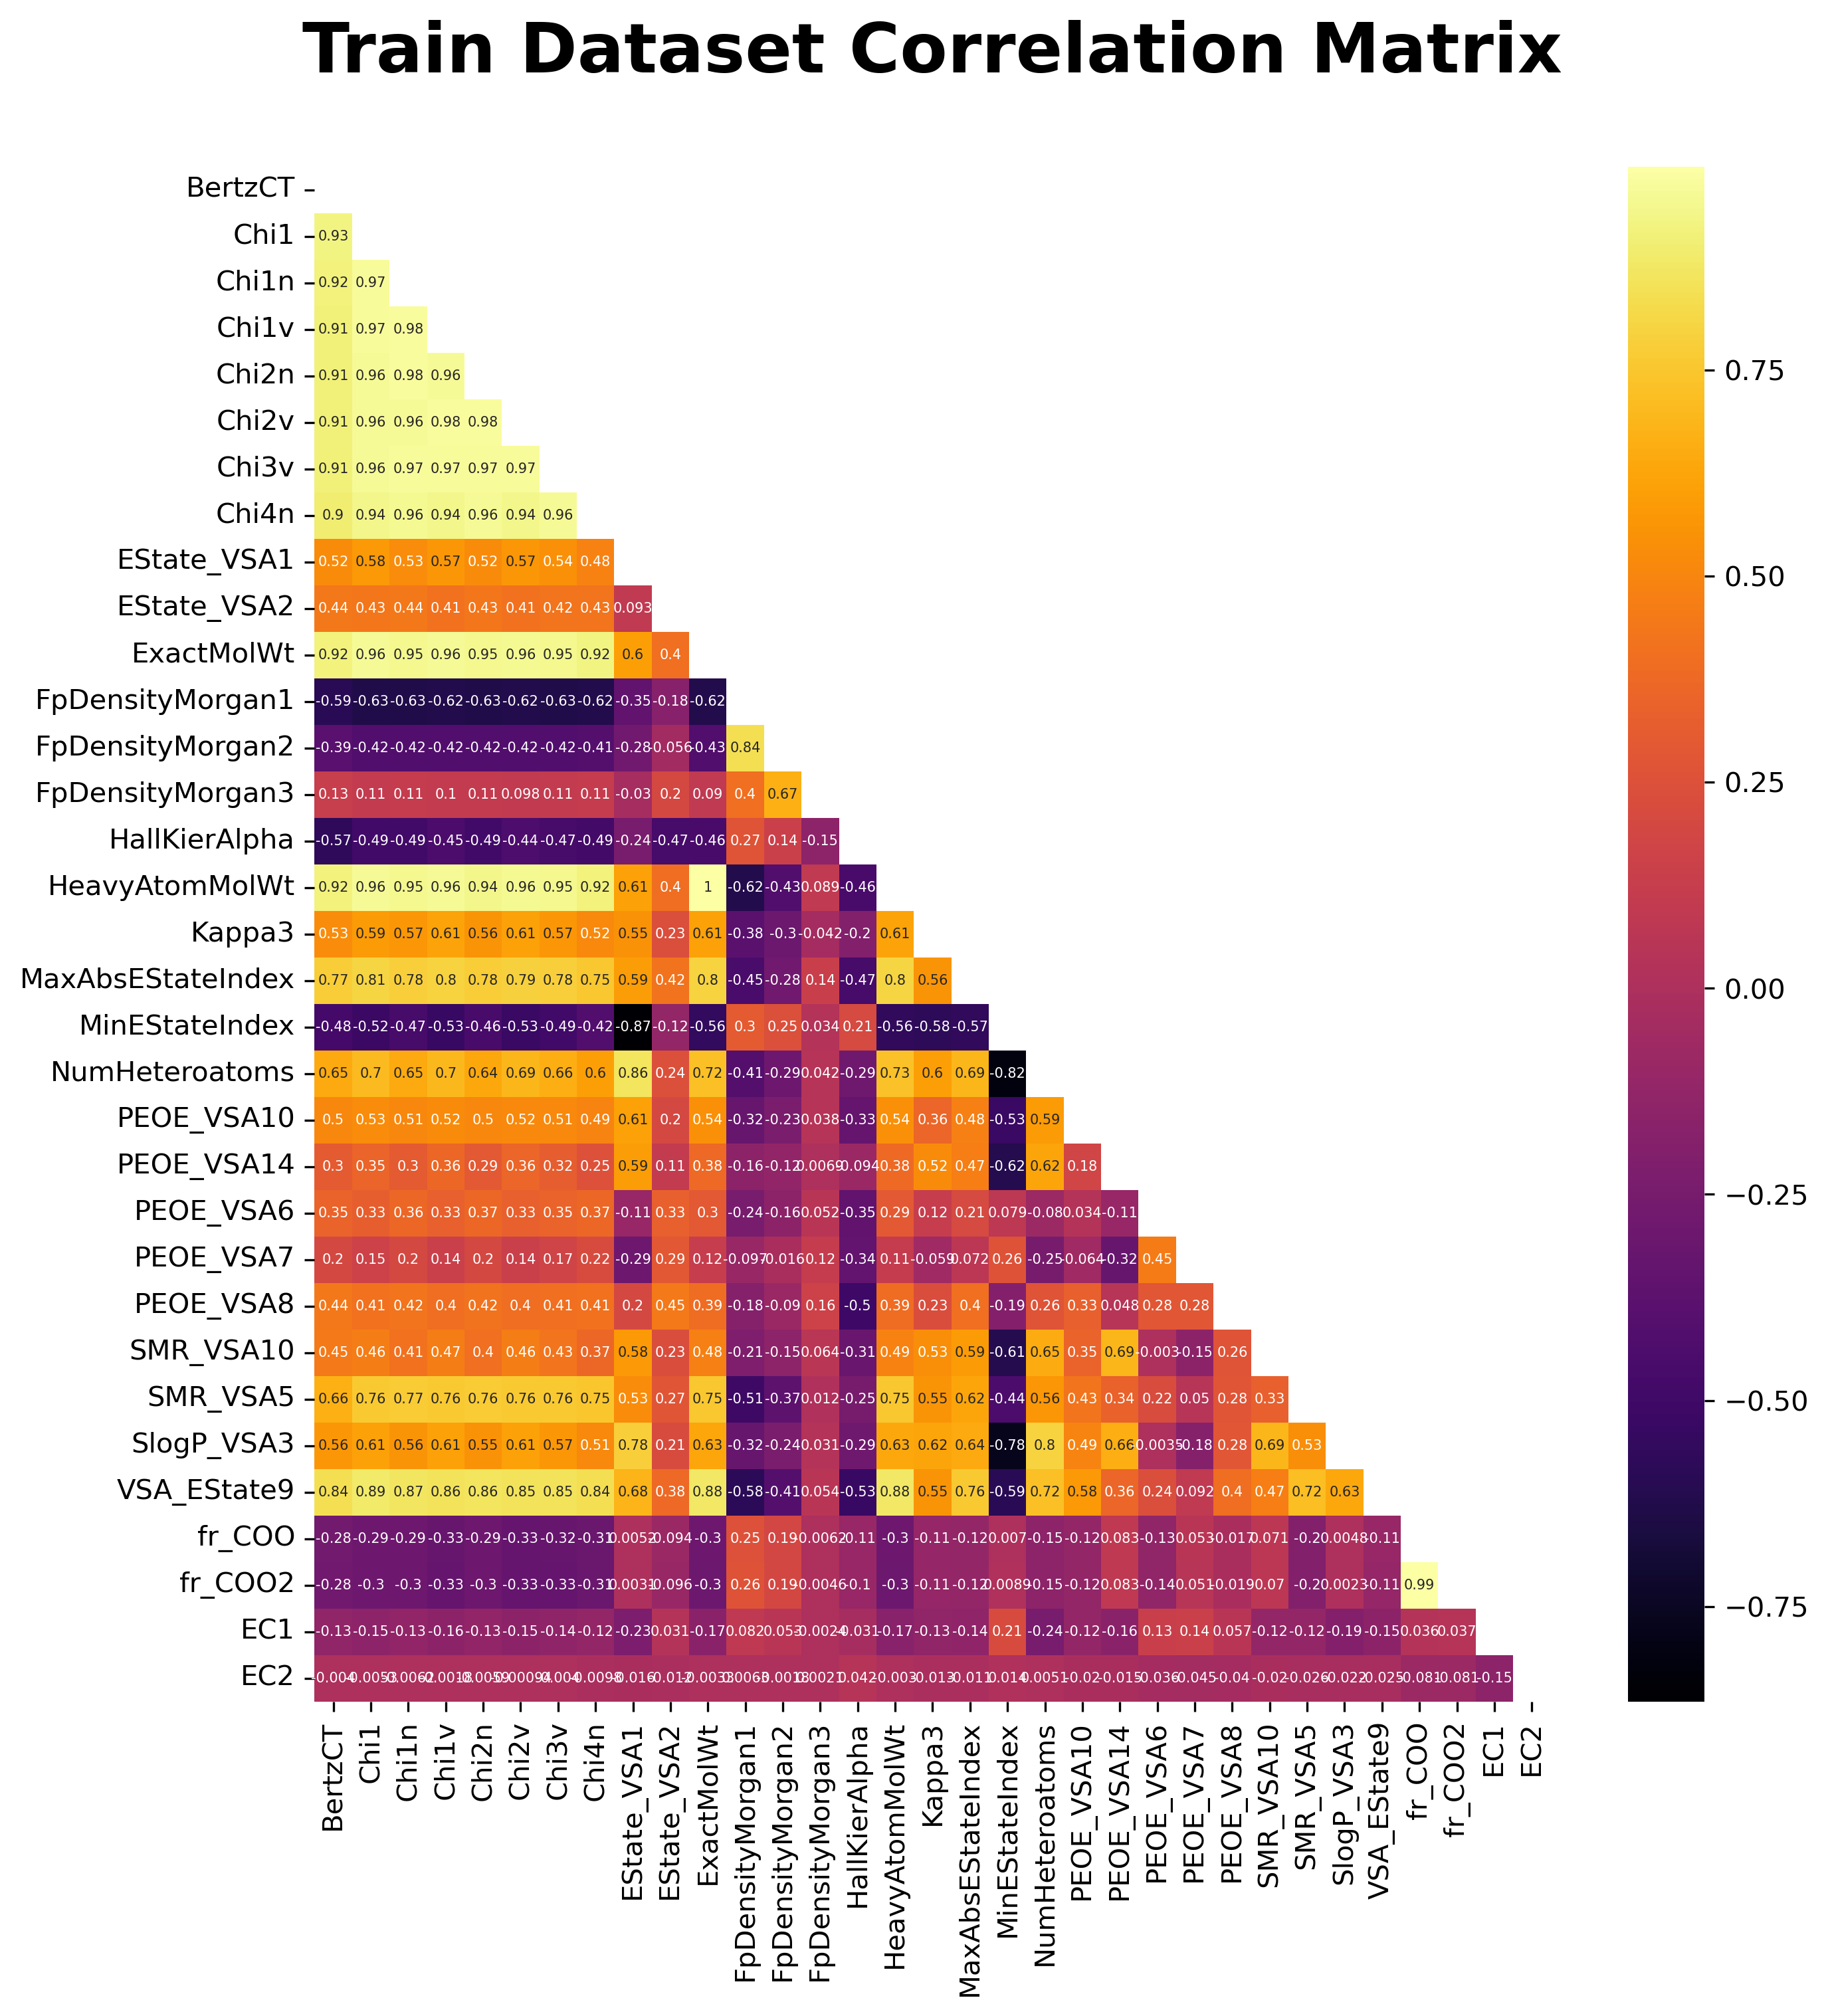

In [6]:
corr_heatmap(train_data, label="Train", cmap="inferno")

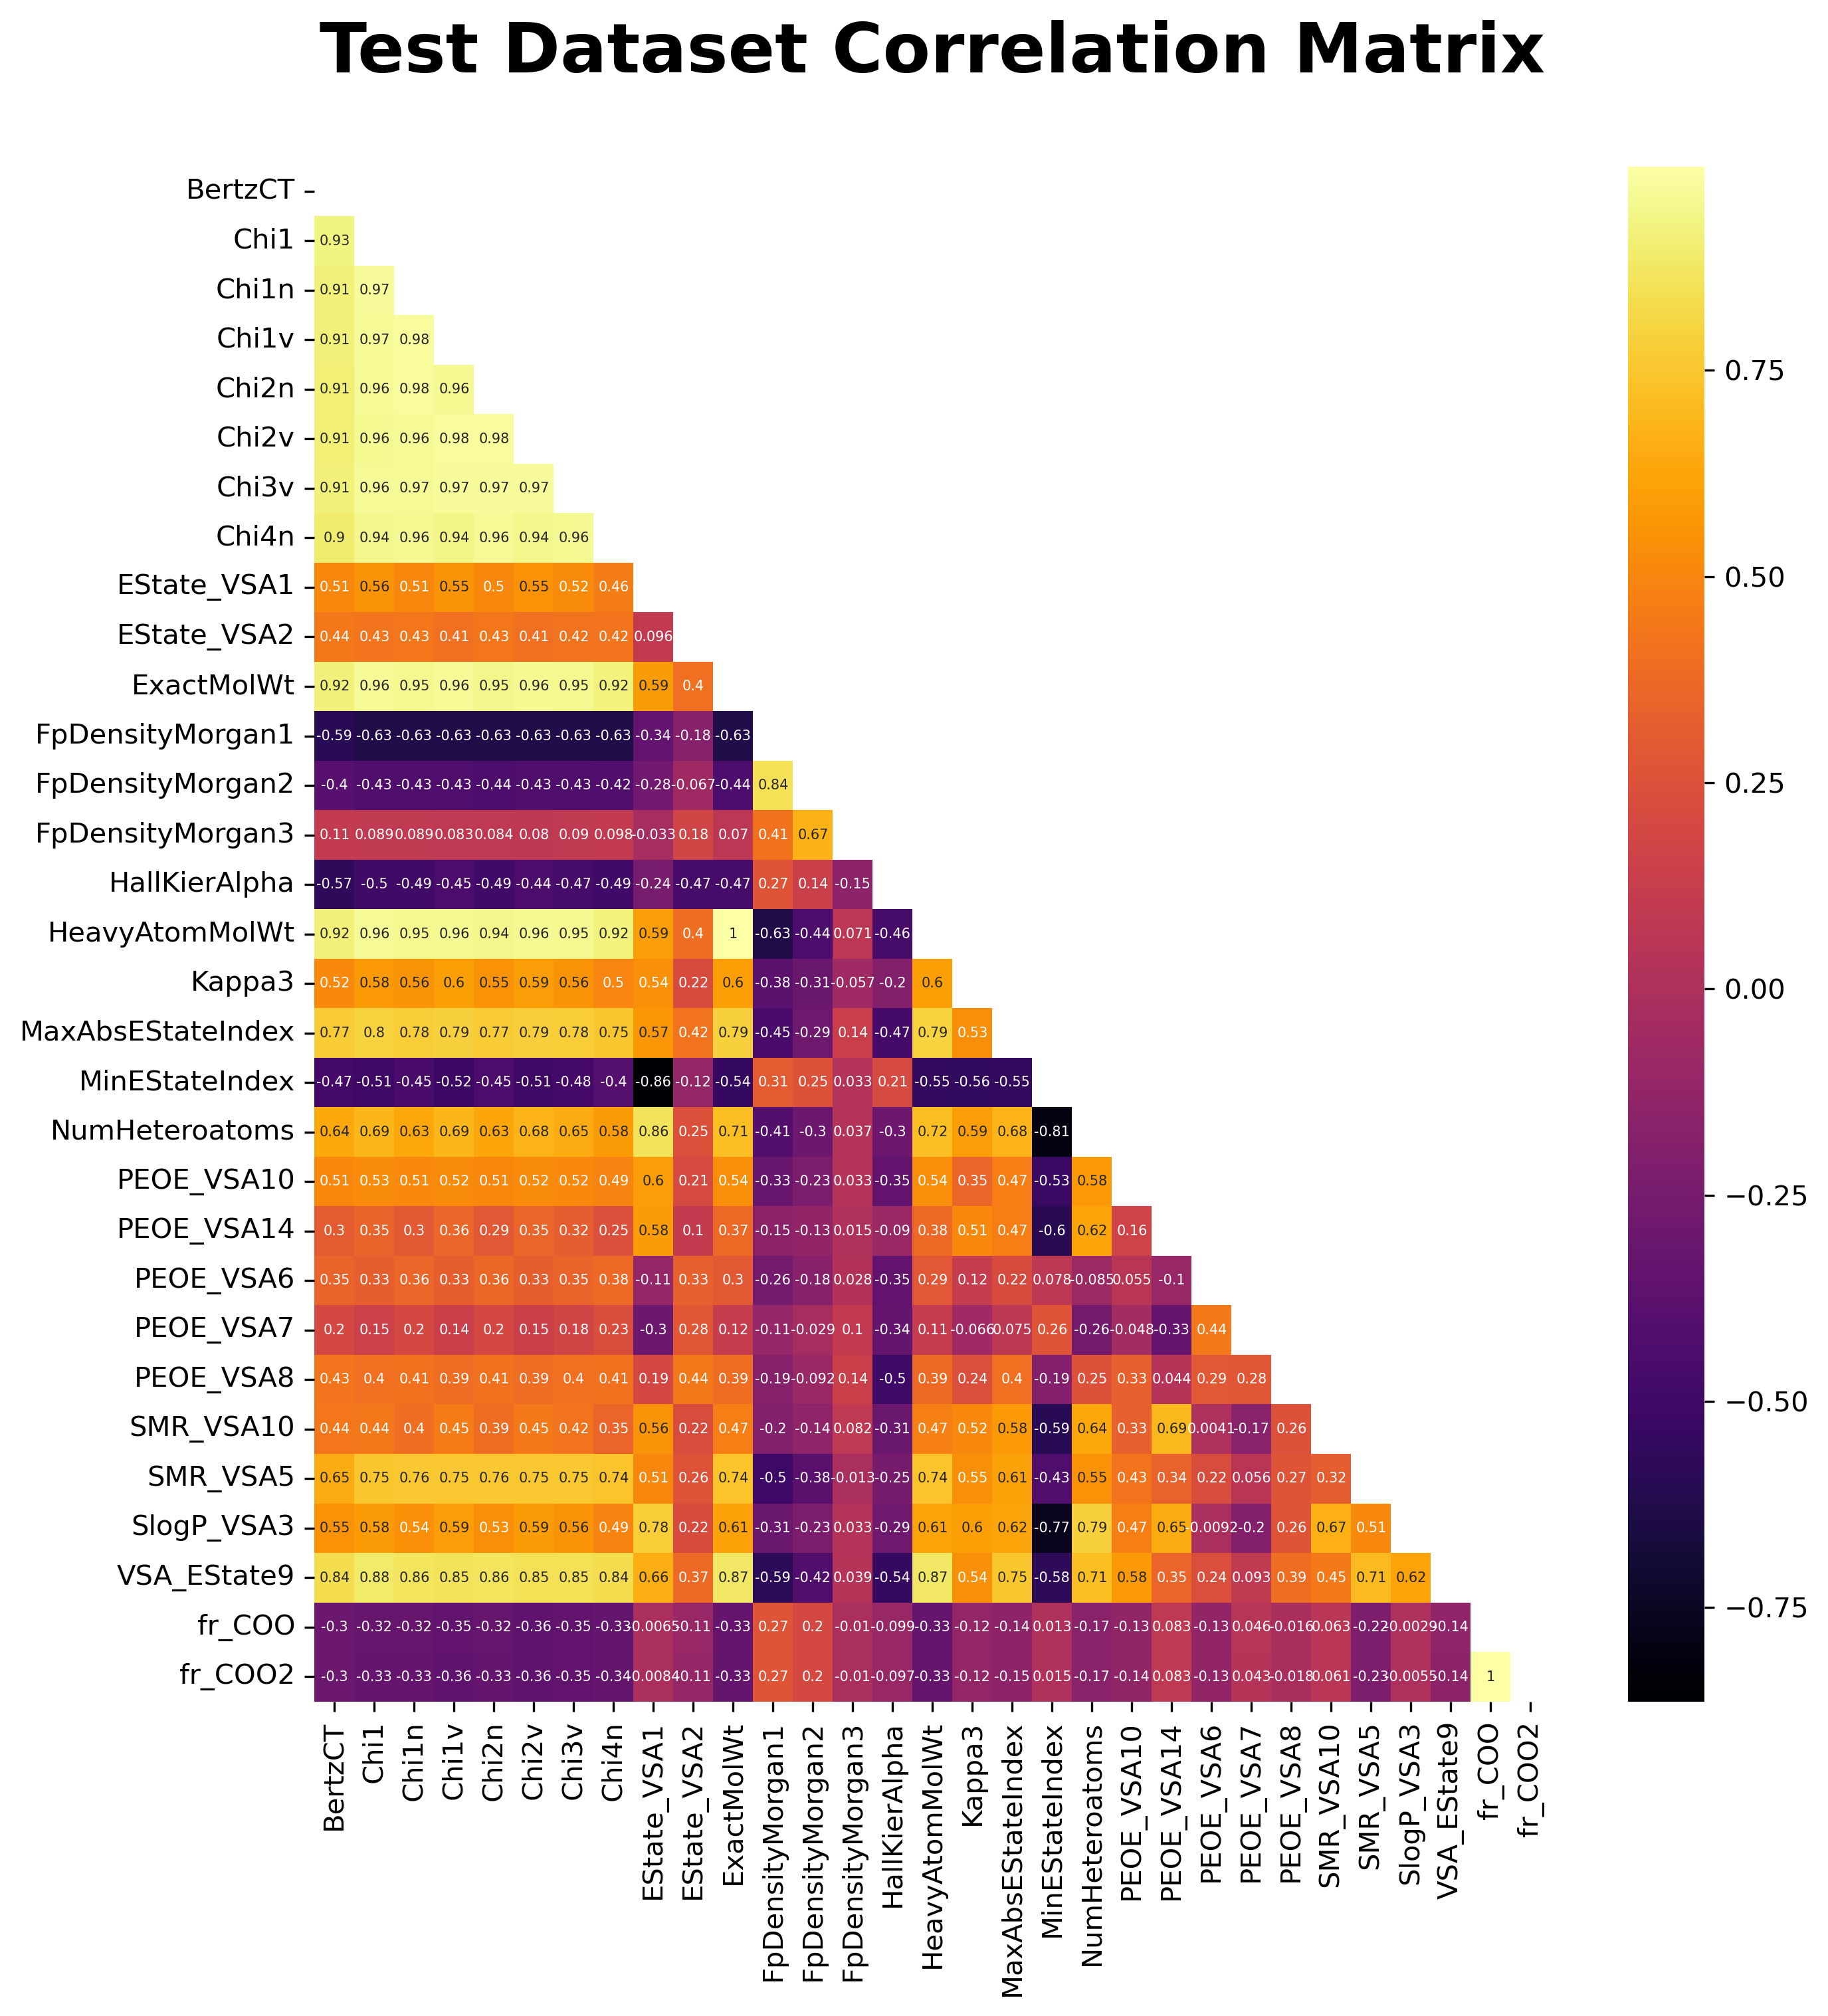

In [7]:
corr_heatmap(test_data, label="Test", cmap="inferno")

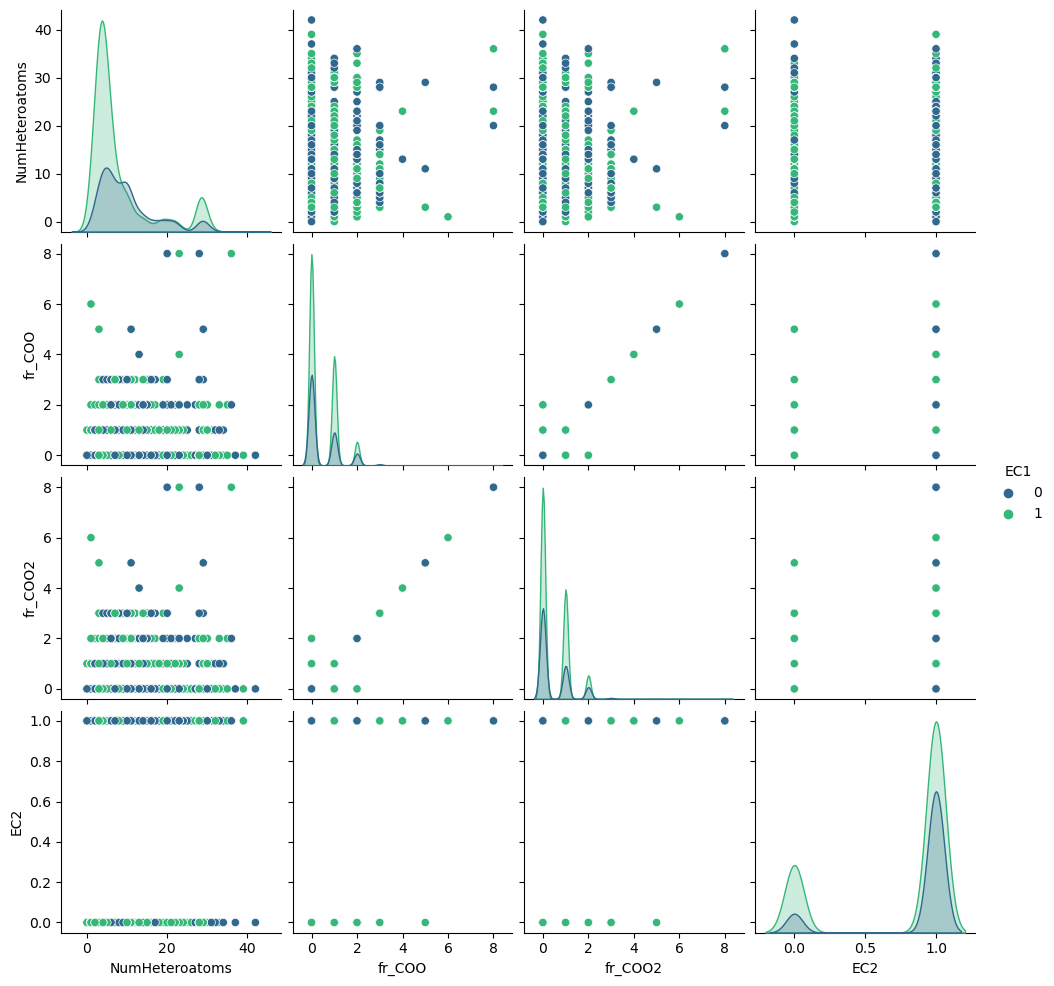

In [8]:
cat_cols = ['NumHeteroatoms','fr_COO','fr_COO2','EC1','EC2'] 
sns.pairplot(train_data[cat_cols], hue = 'EC1', palette="viridis")
plt.show()

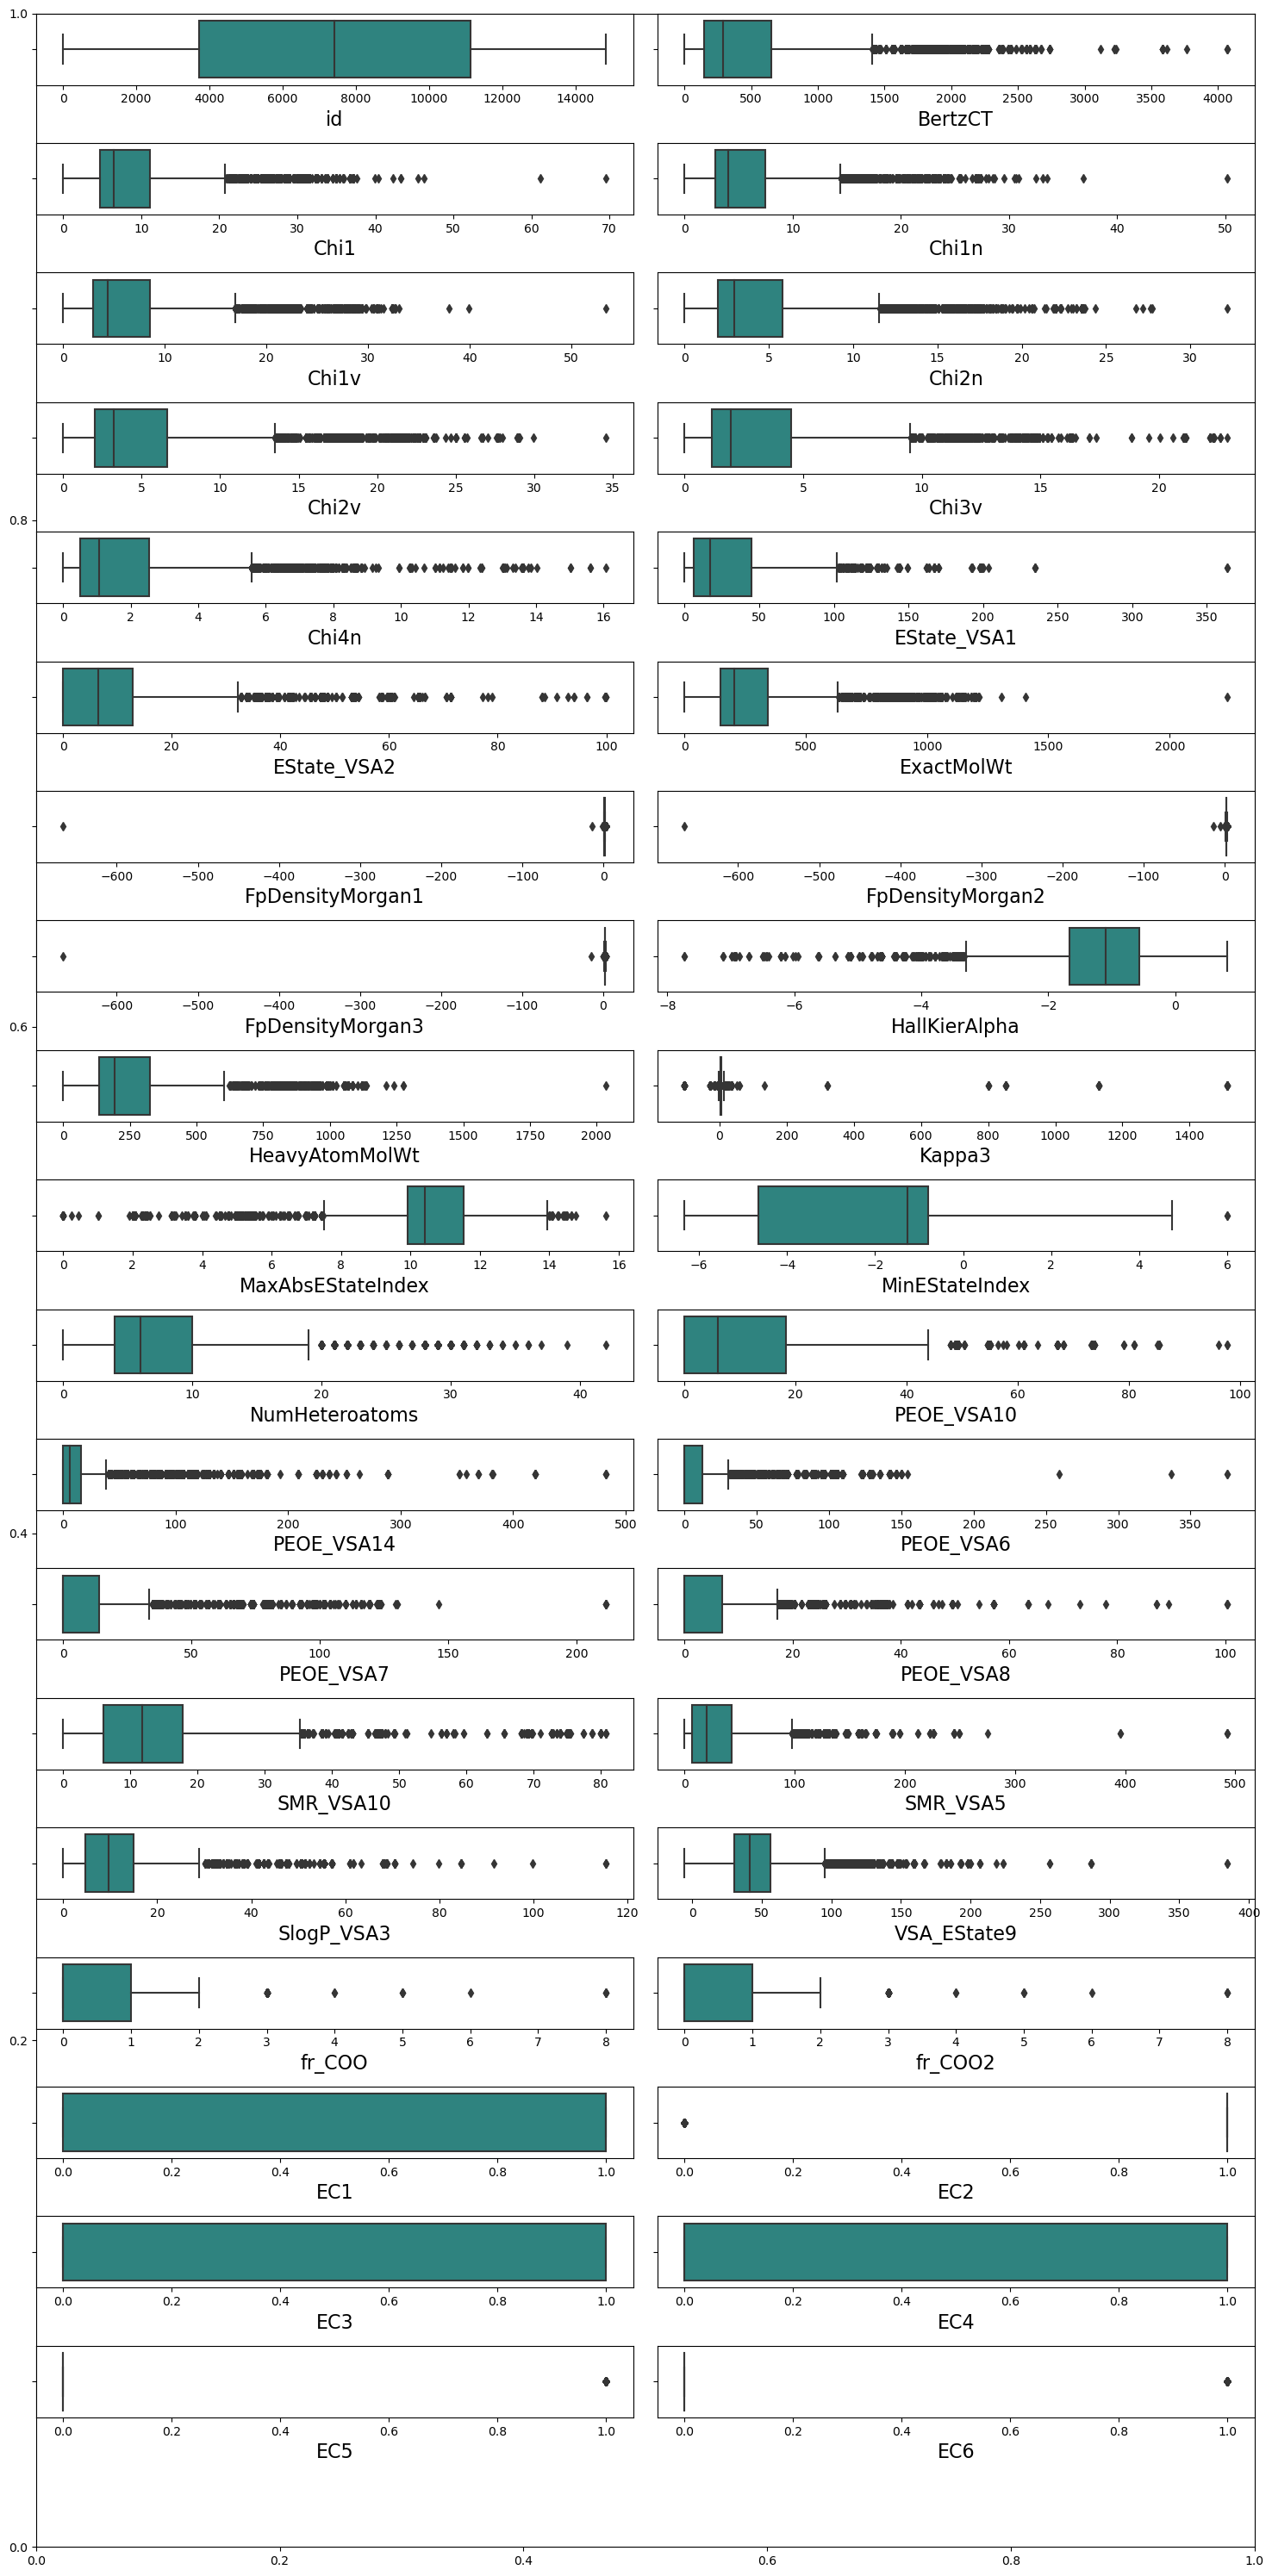

In [9]:
fig, axes = plt.subplots(figsize=(15, 30))

for i, column_name in enumerate(train_data.columns):
    fig.add_subplot(20, 2, i + 1)
    plot = sns.boxplot(x = train_data[column_name], palette="viridis")
    plot.set_xlabel(column_name, fontsize = 16)
plt.tight_layout()

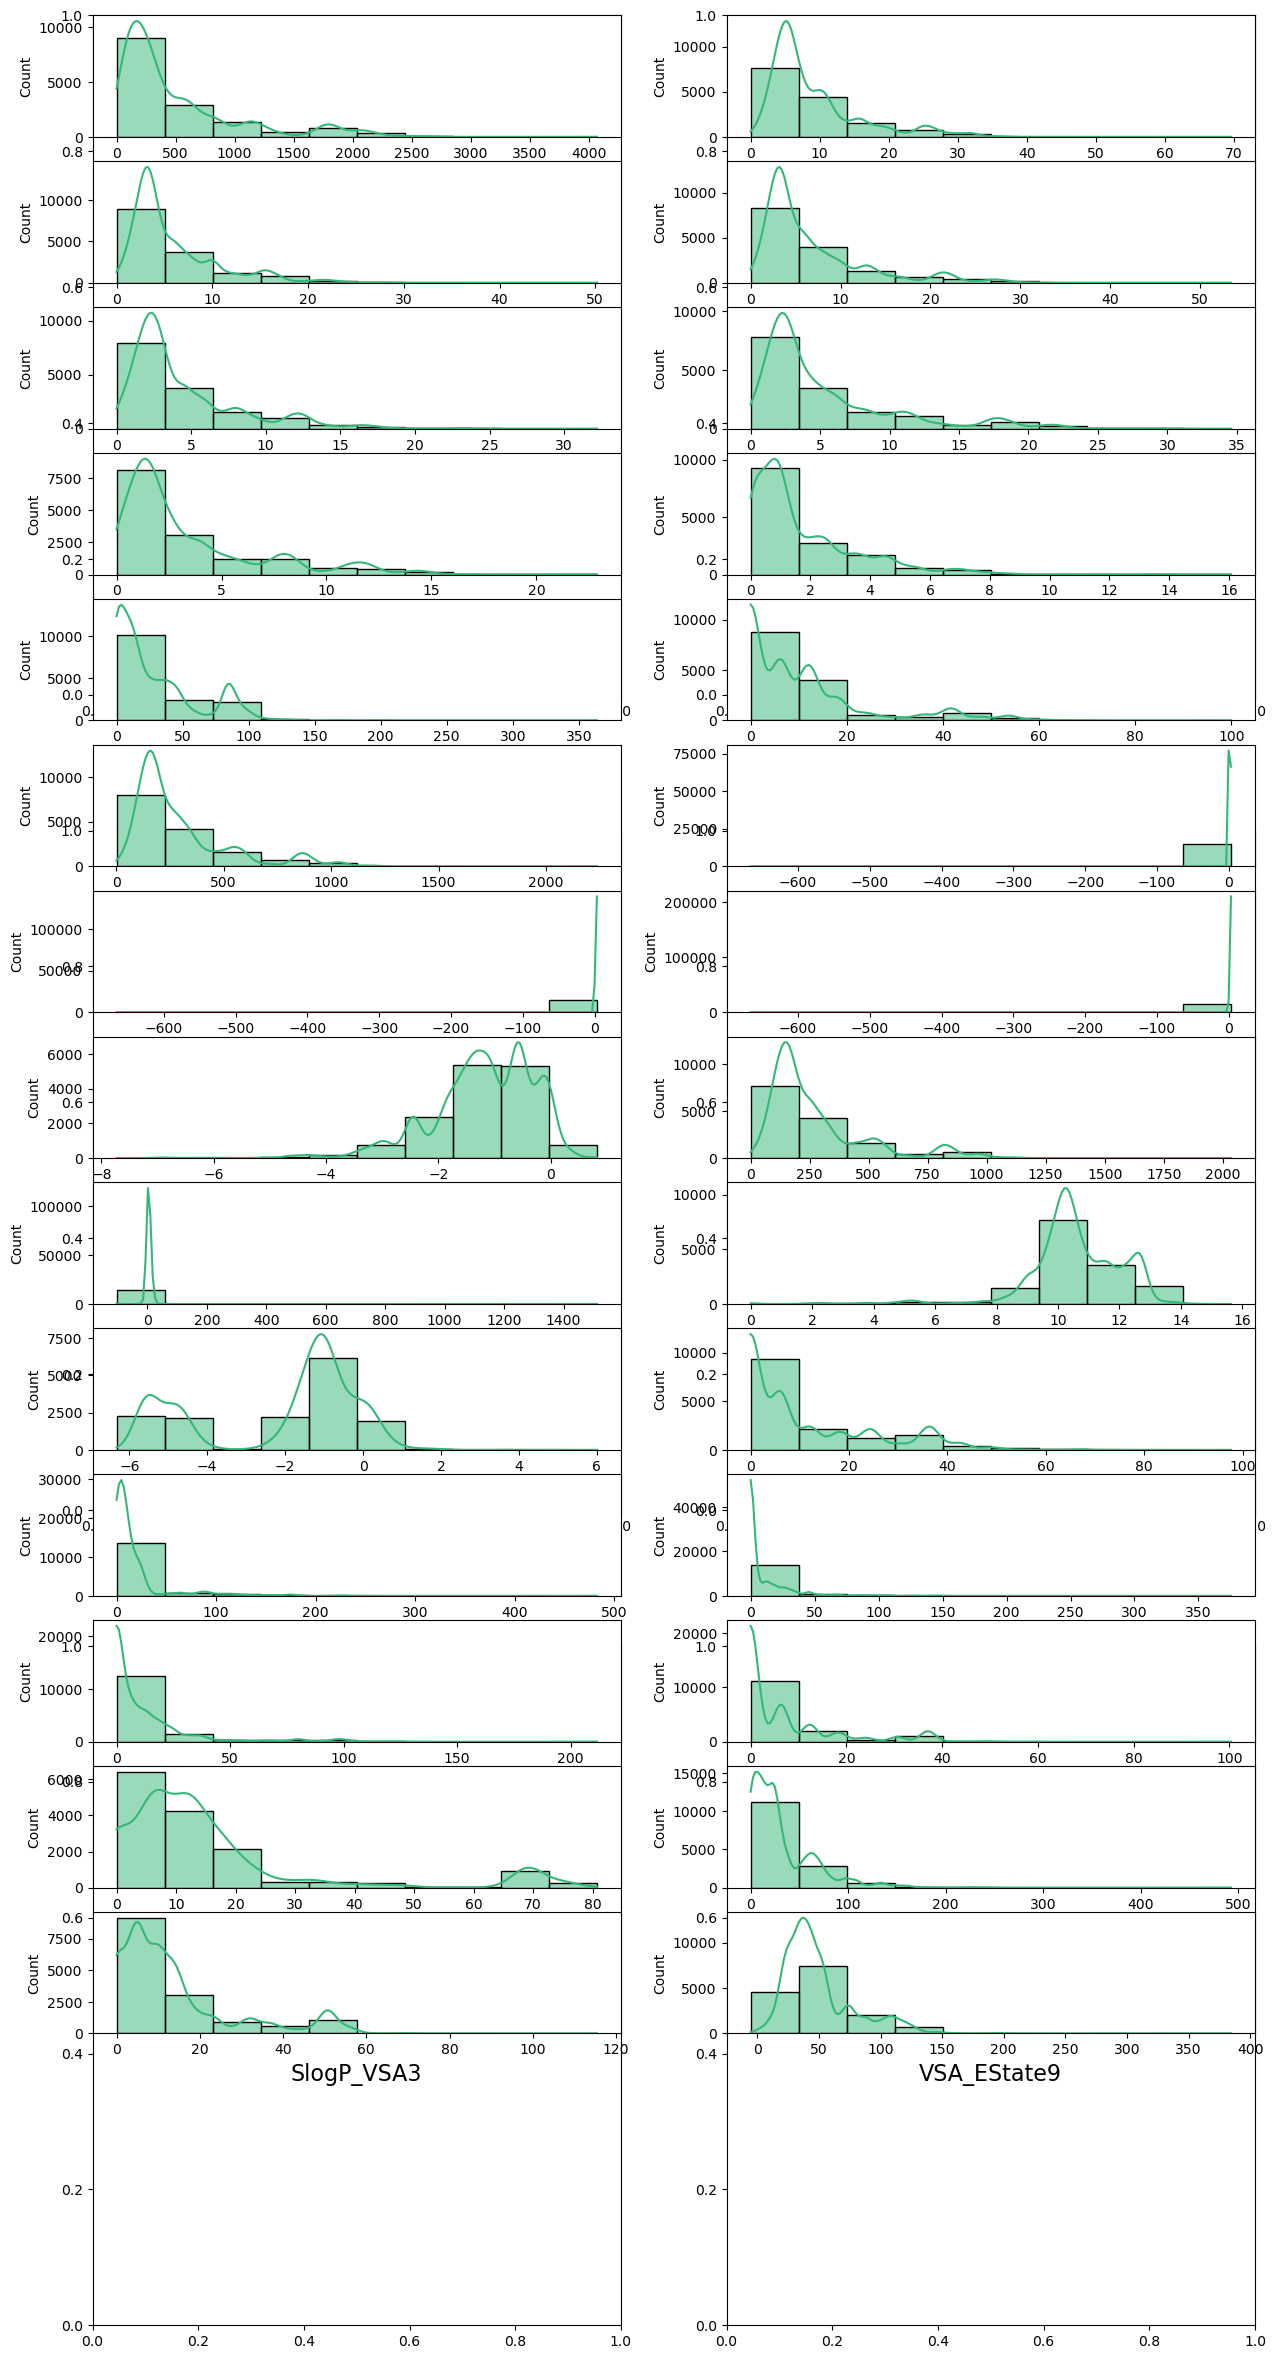

In [10]:
fig, axes = plt.subplots(3,2,figsize=(15, 30))
target = ['EC1','EC2']
for i, column_name in enumerate(train_data.drop(target, axis = 1).select_dtypes(include = 'float64').columns):
    fig.add_subplot(16,2, i + 1)
    plot = sns.histplot(train_data[column_name], kde = True, color = '#34B778', stat = 'count', bins=10)
    plot.set_xlabel(column_name, fontsize = 16)
